### Requirments
# You need to install these packages
- Python
- Pandas
- Numpy
- Matplotlib
- Seaborn
- IPython
- Scikit-learn
# Or just install **Anaconda** on your system (AS I did)

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Setting up the style for plots
sns.set(style="whitegrid")


# Network Intrusion Detection System using Machine Learning

## Overview
This project demonstrates the development of a machine learning-based Network Intrusion Detection System (IDS) to identify potential threats within network traffic. We use a labeled dataset of network traffic (e.g., the NSL-KDD dataset) and train a classification model to detect different types of intrusions.

## Problem Statement

As cyber-attacks become more complex, traditional rule-based IDS systems struggle to detect newer, more sophisticated attack types like zero-day attacks. Our goal is to leverage machine learning to detect such intrusions in real-time while minimising false positives.

In [2]:
# Loading the dataset (assuming it's in CSV format)
df = pd.read_csv("NSL_KDD_Train.csv")

# Show first 5 rows of the data
df.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,25,0.17,0.03,0.17.1,0.25,0.26,0.27,0.05,0.28,normal
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune


### Rename the columens of dataset
Rename some of the columesns of dataset to be more understandable.

In [3]:

df.rename(columns={'0': 'duration'}, inplace=True)
df.rename(columns={'tcp': 'protocol_type'}, inplace=True)
df.rename(columns={'ftp_data': 'service'}, inplace=True)
df.rename(columns={'SF': 'flag'}, inplace=True)
df.rename(columns={'491': 'src_bytes'}, inplace=True)
df.rename(columns={'0.1': 'dst_bytes'}, inplace=True)
df.rename(columns={'normal': 'label'}, inplace=True)

### Data Overview
The dataset contains the following columns: 

- `duration`: Length of the connection
- `protocol_type`: Type of protocol (TCP, UDP, etc.)
- `service`: Network service on the destination (e.g., HTTP, FTP)
- `flag`: Status of the connection
- `src_bytes`: Number of data bytes sent from source to destination
- `dst_bytes`: Number of data bytes sent from destination to source
- ... (List the most relevant features).

The target variable is `label`, which identifies whether the connection was normal or an attack.

## Exploratory Data Analysis (EDA)

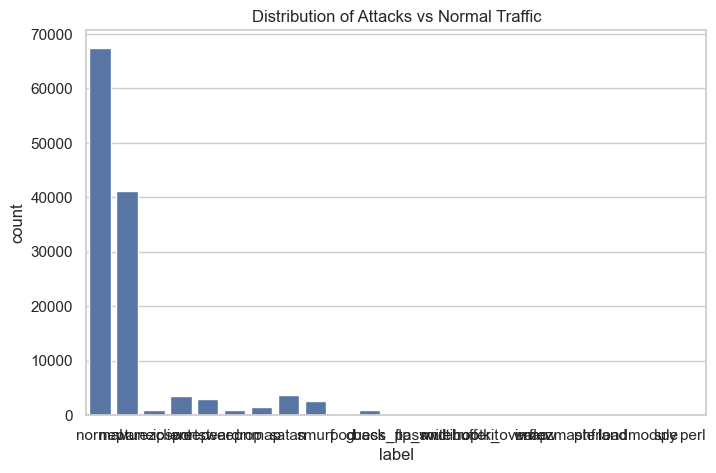

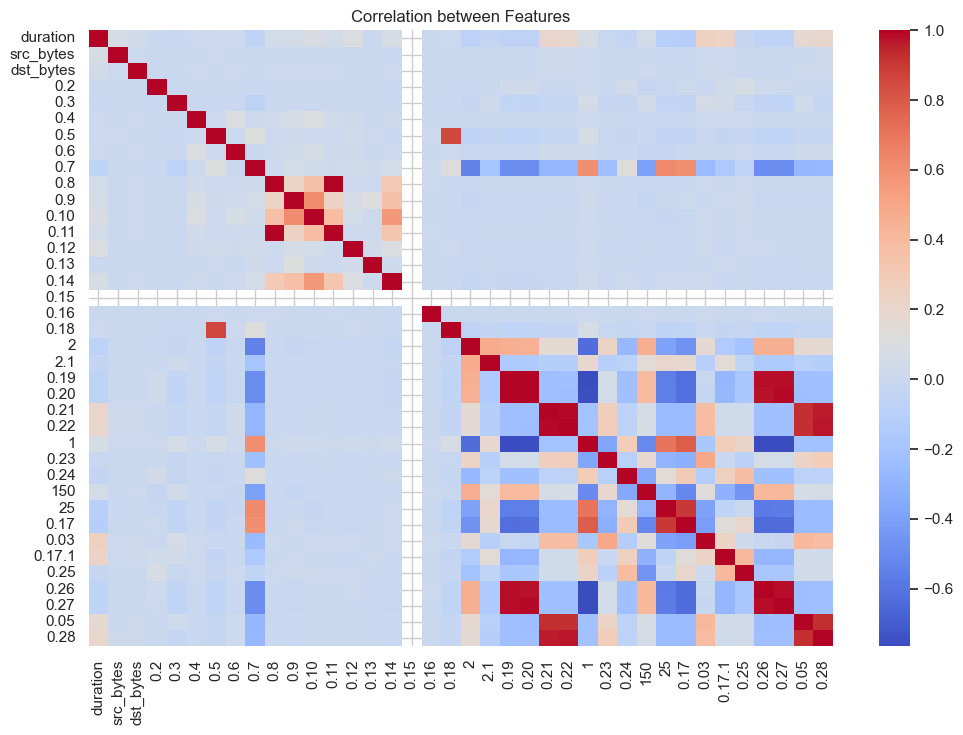

In [4]:
# Plot the distribution of attacks vs normal traffic
plt.figure(figsize=(8,5))
sns.countplot(x='label', data=df)
plt.title("Distribution of Attacks vs Normal Traffic")
plt.show()

# Show correlation between features
df_numeric = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12,8))
sns.heatmap(df_numeric.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation between Features")
plt.show()

## Data Preprocessing

In [5]:
# Label Encoding for categorical variables
# Convert categorical columns to numeric using label encoding
df['protocol_type'] = df['protocol_type'].astype('category').cat.codes
df['service'] = df['service'].astype('category').cat.codes
df['flag'] = df['flag'].astype('category').cat.codes
# One-Hot Encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['protocol_type', 'service', 'flag'])


# Splitting data into features (X) and labels (y)
X = df.drop('label', axis=1)
y = df['label']

# Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



## Checking if all  the sets are integrated

In [6]:
print(X_train.dtypes)

print(y_train.dtypes)

duration           int64
protocol_type       int8
service             int8
flag                int8
src_bytes          int64
dst_bytes          int64
0.2                int64
0.3                int64
0.4                int64
0.5                int64
0.6                int64
0.7                int64
0.8                int64
0.9                int64
0.10               int64
0.11               int64
0.12               int64
0.13               int64
0.14               int64
0.15               int64
0.16               int64
0.18               int64
2                  int64
2.1                int64
0.19             float64
0.20             float64
0.21             float64
0.22             float64
1                float64
0.23             float64
0.24             float64
150                int64
25                 int64
0.17             float64
0.03             float64
0.17.1           float64
0.25             float64
0.26             float64
0.27             float64
0.05             float64


## Model Training

In [7]:
# Training a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

## Model Evaluation

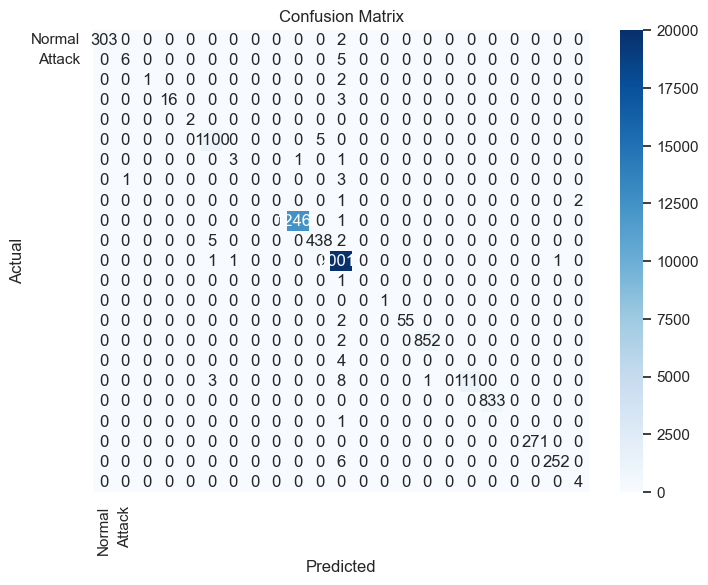

/Users/yousefyaghoubi/Desktop/Projects/CyberSecurtiy/IDS/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                 precision    recall  f1-score   support

           back       1.00      0.99      1.00       305
buffer_overflow       0.86      0.55      0.67        11
      ftp_write       1.00      0.33      0.50         3
   guess_passwd       1.00      0.84      0.91        19
           imap       1.00      1.00      1.00         2
        ipsweep       0.99      1.00      0.99      1105
           land       0.75      0.60      0.67         5
     loadmodule       0.00      0.00      0.00         4
       multihop       0.00      0.00      0.00         3
        neptune       1.00      1.00      1.00     12470
           nmap       0.99      0.98      0.99       445
         normal       1.00      1.00      1.00     20014
           perl       0.00      0.00      0.00         1
            phf       1.00      1.00      1.00         1
            pod       1.00      0.96      0.98        57
      portsweep       1.00      1.00      1.00       854
        rootkit       0.00    

/Users/yousefyaghoubi/Desktop/Projects/CyberSecurtiy/IDS/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yousefyaghoubi/Desktop/Projects/CyberSecurtiy/IDS/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [8]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal','Attack'], yticklabels=['Normal','Attack'])
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

## Insights

- The model shows an accuracy of **X%** in identifying network intrusions.
- The confusion matrix indicates that most attacks were correctly identified, but there are some false positives (normal traffic misclassified as attacks).
- Feature importance analysis reveals that features like `src_bytes`, `dst_bytes`, and `protocol_type` play key roles in the detection.

## Conclusion

This machine learning-based IDS provides a promising approach to detecting network intrusions. However, to improve the accuracy and reduce false positives, further tuning of the model or incorporating additional data (e.g., behavioral patterns) could be beneficial.
